Let's go through the code step by step and explain what each part does.

1. Importing Libraries:
   - `numpy` is imported as `np`.
   - `random` is imported.
   - `operator` is imported.
   - `array` is imported from the `array` module.
   - `math` is imported.

2. Initializing Parameters:
   - `population_size` is set to 10.
   - `pc` (probability of crossover) is set to 0.6.
   - `pm` (probability of mutation) is set to 0.1.

3. Setting the Random Seed:
   - The random seed is set using `random.seed()` with the argument `random.random()`.

4. Fitness Function:
   - The fitness function takes two parameters, `x` and `y`.
   - It calculates the fitness value based on the given mathematical formula.
   - The fitness value is the sum of two terms, `firstTerm` and `secondTerm`.
   - The fitness value is returned.

5. Mapping Functions:
   - `MapBitsToNatural` function converts a binary number to its corresponding decimal representation.
   - `MapNaturaltoBits` function converts a decimal number to its corresponding binary representation.
   - `MapNautalToSearchSpace` function maps a natural number to a search space.

6. Crossover Function:
   - The `CrossOver` function takes a dictionary of selected numbers as input.
   - It performs crossover between pairs of selected numbers based on the probability of crossover (`pc`).
   - The crossover is performed by swapping bits between the two numbers.
   - The updated dictionary of selected numbers is returned.

7. Initializing the Population:
   - The `InitPopulation` function initializes the population of individuals.
   - It creates a dictionary called `generations` to store the individuals.
   - For each individual, a random `x` and `y` value is generated within a specified range.
   - The fitness value is calculated for each individual using the `fitness` function.
   - The binary representation of `x` and `y` is obtained using the `MapNaturaltoBits` function.
   - The `xy` value is created by concatenating the binary representations of `x` and `y`.
   - The individual is added to the `generations` dictionary with its corresponding fitness value.
   - The `generations` dictionary is returned.

8. Mutation Function:
   - The `Mutation` function takes a dictionary of selected numbers as input.
   - It performs mutation on each selected number based on the probability of mutation (`pm`).
   - For each bit in the selected number, a random number is generated.
   - If the random number is less than or equal to `pm`, the bit is flipped.
   - The updated dictionary of selected numbers is returned.

9. Decode and Calculate Fitness Function:
   - The `DecodeAndCalFitness` function takes a dictionary of selected numbers as input.
   - It decodes the binary representation of `x` and `y` for each selected number.
   - The decoded values are mapped to the search space using the `MapNautalToSearchSpace` function.
   - The fitness value is calculated for each selected number using the `fitness` function.
   - The best fitness value and corresponding `xy` value are tracked.
   - The fitness values are updated in the dictionary of selected numbers.
   - The updated dictionary, best fitness value, and best `xy` value are returned.

10. 5-K Tournament Selection Function:
    - The `tournament5` function takes a dictionary of individuals as input.
    - It performs a 5-K tournament selection process to select the best individuals.
    - For each individual, 5 random individuals are selected from the population.
    - The individual with the lowest fitness value is chosen as the winner.
    - The selected individuals are added to a new dictionary called `NewgenerationDictN`.
    - The `NewgenerationDictN` dictionary is returned.

11. Genetic Algorithm Function:
    - The `GA` function implements the genetic algorithm.
    - It initializes the generation count (`t`), maximum iteration count (`maxIteration`), best fitness value (`bestfitness`), best `xy` value (`bestXY`), and iteration count when the best solution is found (`IterFound`).
    - The population is initialized using the `InitPopulation` function.
    - The main loop runs until the maximum iteration count is reached.
    - In each iteration, the tournament selection, crossover, mutation, and fitness calculation are performed.
    - If a better fitness value is found, the best fitness value, best `xy` value, and iteration count are updated.
    - The loop counter (`t`) is incremented.
    - The best fitness value, best `xy` value, and iteration count when the best solution is found are returned.

12. Running the Genetic Algorithm:
    - The `bestfitness`, `bestXY`, and `IterFound` values are obtained by calling the `GA` function.

13. Decoding the Best Solution:
    - The `x` and `y` values are extracted from the `bestXY` string.
    - The binary representations of `x` and `y` are converted to decimal using the `MapBitsToNatural` function.
    - The decimal values are mapped to the search space using the `MapNautalToSearchSpace` function.
    - The best fitness value, mapped `x` value, mapped `y` value, and iteration count when the best solution is found are printed.

## Fisrt step: translate the fitness funcion to our SNN function
WE need to find a way to tell python that we want to run a command in the terminal.
-> If you use the "!" symbol, you can run terminal commands in the notebook.

In [1086]:
import numpy as np
import random
from random import randint
import operator
from array import *
import operator
import math
import time
import itertools

# Initialize parameters
population_size = 12
num_next_generation = 20
num_childs = 2
pc = 0.6  # Probability of crossover
pm = 0.1  # Probability of mutation

random.seed(random.random())

# Fitness function
def fitness(x, y):
    firstTerm = -1 * (abs(0.5 * x * (math.sin(math.sqrt(abs(x))))))
    secondTerm = -1 * (abs(y * math.sin(30 * math.sqrt(abs(x / float(y))))))
    return firstTerm + secondTerm

# Mapping functions
def encode_and_scale(real_value, min_value, max_value, num_bits):
    scaled_value = int((real_value - min_value) / (max_value - min_value) * (2**num_bits - 1))
    binary_representation = bin(scaled_value)[2:].zfill(num_bits)
    return binary_representation

def decode_and_rescale(encoded_value, min_value, max_value, num_bits):
    scaled_value = int(encoded_value, 2)
    real_value = min_value + scaled_value / (2**num_bits - 1) * (max_value - min_value)
    return real_value


# Crossover function
def CrossOver(SelectedNumbersDict):
    NewGenFromSelected = {}
    j = 0
    for i in range(0, len(SelectedNumbersDict), 2):
        randnum = random.random()
        if randnum <= pc:
            num1 = SelectedNumbersDict[i]["xy"]
            num2 = SelectedNumbersDict[i + 1]["xy"]

            # Perform single-point crossover
            crossover_point = random.randint(1, len(num1) - 1)
            child1 = num1[:crossover_point] + num2[crossover_point:]
            child2 = num2[:crossover_point] + num1[crossover_point:]

            # Add the children to the new generation
            NewGenFromSelected[j] = {"xy": child1}
            j += 1
            NewGenFromSelected[j] = {"xy": child2}
            j += 1


    return NewGenFromSelected

# Initialize the population
def InitPopulation():
    generations = {}
    for i in range(population_size):
        randomx = random.randint(10, 1000)
        randomy = random.randint(10, 1000)
        fit = fitness(randomx, randomy)
        xbin = encode_and_scale(randomx, 10, 1000, 10)
        ybin = encode_and_scale(randomy, 10, 1000, 10)
        xy = xbin + ybin
        generations[i] = {"xy": xy, "fitness": fit}
    return generations

# Mutation function
def Mutation(individual):
    encoded_value = individual["xy"]
    mutated_encoded_value = ''.join(
        '0' if bit == '1' and random.random() < pm else '1' if bit == '0' and random.random() < pm else bit
        for bit in encoded_value
    )
    individual["xy"] = mutated_encoded_value
    return individual

# Decode the fitness and calculate it for each new generation
def DecodeAndCalFitness(SelectedNumbersDict):
    bestfit = float('inf')  # Initialize to positive infinity
    bestXY = ""
    
    for _, individual in SelectedNumbersDict.items():
        num = individual["xy"]
        x = num[:10]
        y = num[10:]


        mapX = decode_and_rescale(x, 10, 1000, 10)
        mapY = decode_and_rescale(y, 10, 1000, 10)

        fit = fitness(mapX, mapY)
        individual["fitness"] = fit

        if fit < bestfit:
            bestfit = fit
            bestXY = num

    return SelectedNumbersDict, bestfit, bestXY


def tournament5(generationDictN):
    choice_list = list(generationDictN.keys())
    NewgenerationDictN = {}
    
    for i in range(population_size):
        ktournament = []
        bestNum = 0
        bestFit = float('inf')  # Initialize to positive infinity
        best_randomNum = 0
        
        for j in range(5):
            if not choice_list:
                break  # Exit the loop if choice_list is empty
            random_index = random.choice(choice_list)
            randomNum = generationDictN[random_index]
            ktournament.append(randomNum)
            
            if randomNum["fitness"] < bestFit:
                bestFit = randomNum["fitness"]
                bestNum = randomNum["xy"]
                best_randomNum = random_index

        if best_randomNum in choice_list:
            choice_list.remove(best_randomNum)
        
        if not ktournament:
            continue  # Skip iteration if ktournament is empty
        
        NewgenerationDictN[i] = {"xy": bestNum, "fitness": bestFit}

    return NewgenerationDictN




# Genetic Algorithm
def GA():
    t = 0
    maxIteration = 1000
    bestfitness = float('inf')  # Initialize to positive infinity
    bestXY = ""
    IterFound = 0
    generationDictN = InitPopulation()

    while t < maxIteration:
        SelectedNumbersDict = tournament5(generationDictN)
        SelectedNumbersDict = CrossOver(SelectedNumbersDict)

        # Apply mutation to each individual separately
        SelectedNumbersDict = {key: Mutation(individual) for key, individual in SelectedNumbersDict.items()}

        generationDictN, bestfit, bestXandY = DecodeAndCalFitness(SelectedNumbersDict)

        if bestfit < bestfitness:
            bestfitness = bestfit
            bestXY = bestXandY
            IterFound = t

        t += 1

    return bestfitness, bestXY, IterFound



bestfitness, bestXY, IterFound = GA()

x = bestXY[:10]
y = bestXY[10:]

mapX = decode_and_rescale(x, 10, 1000, 10)
mapY = decode_and_rescale(y, 10, 1000, 10)


print("Best Fitness:", bestfitness)
print("Mapped X:", mapX)
print("Mapped Y:", mapY)
print("Iteration Found:", IterFound)


Best Fitness: -943.5386507289762
Mapped X: 879.0322580645161
Mapped Y: 516.1290322580645
Iteration Found: 1


Checl initial population

In [1087]:
initialize_population = InitPopulation()
print("Initial Population:")
for _, individual in initialize_population.items():
    print(individual)

Initial Population:
{'xy': '00111000111100001100', 'fitness': -576.0789689861957}
{'xy': '11001111111100011111', 'fitness': -687.9904252098122}
{'xy': '00111100010100010011', 'fitness': -43.26404345578186}
{'xy': '00001010011010001000', 'fitness': -563.4891034615388}
{'xy': '01011011110111000000', 'fitness': -432.99967162367466}
{'xy': '01010000010101111100', 'fitness': -351.2290153153974}
{'xy': '00011000011000000001', 'fitness': -468.5922366211981}
{'xy': '11010011001110001010', 'fitness': -758.9708580368308}
{'xy': '00001010111001101001', 'fitness': -389.39832217588264}
{'xy': '00000100001001010110', 'fitness': -23.73591252412463}
{'xy': '00000100101111000110', 'fitness': -861.9856407318271}
{'xy': '01101100000110011101', 'fitness': -478.4344574967449}


Check tournament selection

In [1088]:
tournament5 = tournament5(initialize_population)
print("Tournament 5:")
for _, individual in tournament5.items():
    print(individual)

Tournament 5:
{'xy': '11001111111100011111', 'fitness': -687.9904252098122}
{'xy': '00000100101111000110', 'fitness': -861.9856407318271}
{'xy': '11010011001110001010', 'fitness': -758.9708580368308}
{'xy': '00001010011010001000', 'fitness': -563.4891034615388}
{'xy': '00111000111100001100', 'fitness': -576.0789689861957}
{'xy': '01101100000110011101', 'fitness': -478.4344574967449}
{'xy': '01011011110111000000', 'fitness': -432.99967162367466}
{'xy': '00011000011000000001', 'fitness': -468.5922366211981}
{'xy': '00001010111001101001', 'fitness': -389.39832217588264}
{'xy': '01010000010101111100', 'fitness': -351.2290153153974}
{'xy': '00111100010100010011', 'fitness': -43.26404345578186}
{'xy': '00000100001001010110', 'fitness': -23.73591252412463}


Crossover

In [1089]:
crossover = CrossOver(tournament5)
print("Crossover:")
for _, individual in crossover.items():
    print(individual,"Before Mutation: ", decode_and_rescale(individual["xy"][:10], 10, 1000, 10), decode_and_rescale(individual["xy"][10:], 10, 1000, 10))

Crossover:
{'xy': '11000100101111000110'} Before Mutation:  770.6451612903226 944.8387096774194
{'xy': '00001111111100011111'} Before Mutation:  70.96774193548387 783.2258064516129


In [1090]:
# Apply mutation to each individual separately
mutation = {key: Mutation(individual) for key, individual in crossover.items()}
print("Mutation:")
for _, individual in mutation.items():
    print(individual,"After Mutation: ", decode_and_rescale(individual["xy"][:10], 10, 1000, 10), decode_and_rescale(individual["xy"][10:], 10, 1000, 10))


Mutation:
{'xy': '10100100101111000110'} After Mutation:  646.7741935483871 944.8387096774194
{'xy': '00101111100100011111'} After Mutation:  193.8709677419355 287.7419354838709


In [1091]:
# Decode the fitness and calculate it for each new generation
generationDictN, bestfit, bestXandY = DecodeAndCalFitness(mutation)

print("Decode and Calculate Fitness:")
for _, individual in generationDictN.items():
    print(individual)
print("---------------------------")
print("Best Fitness:", bestfit)
print("Best XY:", bestXandY)
print("Iteration Found:", IterFound)

Decode and Calculate Fitness:
{'xy': '10100100101111000110', 'fitness': -385.08699008738984}
{'xy': '00101111100100011111', 'fitness': -234.64039095830054}
---------------------------
Best Fitness: -385.08699008738984
Best XY: 10100100101111000110
Iteration Found: 1


In [1092]:
#do permutatin example
a = [1,2,3]

import itertools
list(itertools.permutations([1,2]))[0]


(1, 2)

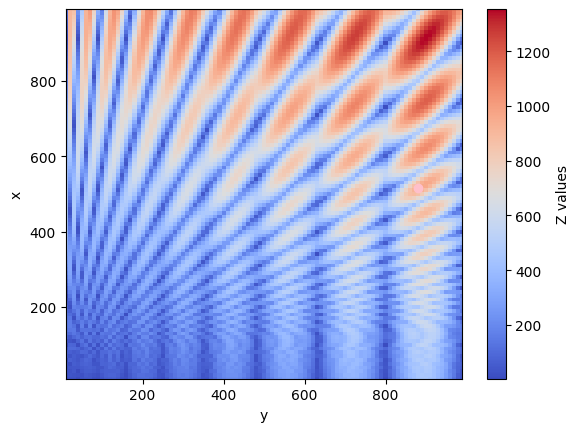

In [1093]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# Generate data
X = np.arange(10, 1000, 10)
Y = np.arange(10, 1000, 10)
X, Y = np.meshgrid(X, Y)
Z = (abs(0.5 * X * (np.sin(np.sqrt(abs(X)))))) + (abs(Y * np.sin(30 * np.sqrt(abs(X / Y)))))

# Create a color plot
plt.pcolormesh(X, Y, Z, cmap=cm.coolwarm, shading='auto')

# Add colorbar
plt.colorbar(label='Z values')

# Set axis limits
plt.xlim(X.min(), X.max())
plt.ylim(Y.min(), Y.max())

# Set axis labels
plt.xlabel('X')
plt.ylabel('Y')

# Show the plot
# plt.show()


#plot the best fitness
plt.plot(mapX,mapY,'o', color='pink')
plt.ylabel('x')
plt.xlabel('y')
plt.show()


# Algorithm 2: Genetic Algorithm for SNN

In [1094]:
#intitila parameters
population_size=10
pc=0.6
pm=0.1 #probability of mutation (

random.seed(random.random())

In [1095]:
# import subprocess
# import re

# def run_SNN(N_ev, N_ep, NL0, NL1, tau_m, tau_s, tau_plus, tau_minus, a_plus, a_minus, CFI0, CF01, CFI1, alpha, TH0, TH1, file_id_GS):
#     try:

#         command = f'../SNNT13.out --N_ev {N_ev} --N_ep {N_ep} --NL0 {NL0} --NL1 {NL1} --tau_m {tau_m} --tau_s {tau_s} --tau_plus {tau_plus} --tau_minus {tau_minus} --a_plus {a_plus} --a_minus {a_minus} --CFI0 {CFI0} --CF01 {CF01} --CFI1 {CFI1} --alpha {alpha} --TH0 {TH0} --TH1 {TH1} --file_id_GS {file_id_GS}'
        

#         result = subprocess.run(command, shell=True, capture_output=True, text=True)
        

#         relevant_lines = [line.strip() for line in result.stdout.split('\n') if 'Average efficiency' in line or 'Average fake rate' in line]
        

#         values = [float(re.search(r'\d+\.\d+', line).group()) if re.search(r'\d+\.\d+', line) else 0 for line in relevant_lines]
        
#         return values
    
#     except Exception as e:
#         print(f"Errore durante l'esecuzione di SNN: {e}")
#         return None

# output_values = run_SNN(
#     N_ev=1000, N_ep=1, NL0=6, NL1=6, tau_m=1e-09/2, tau_s=0.25e-09/4, tau_plus=1.68e-09/4, tau_minus=3.37e-09/4,
#     a_plus=0, a_minus=0, CFI0=1, CF01=1, CFI1=1, alpha=0.5, TH0=0.45, TH1=0.45, file_id_GS=0
# )

# if output_values:
#     print(f'Average efficiency: {output_values[0]}')
#     print(f'Average fake rate: {output_values[1]}')


import subprocess
import re

def run_SNN(N_ev,tau_m, tau_s):
    try:

        command = f'../SNNT13.out --N_ev {N_ev} --tau_m {tau_m} --tau_s {tau_s}'
        

        result = subprocess.run(command, shell=True, capture_output=True, text=True)
        

        relevant_lines = [line.strip() for line in result.stdout.split('\n') if 'Average efficiency' in line or 'Average fake rate' in line]
        

        values = [float(re.search(r'\d+\.\d+', line).group()) if re.search(r'\d+\.\d+', line) else 0 for line in relevant_lines]
        
        return values
    
    except Exception as e:
        print(f"Errore durante l'esecuzione di SNN: {e}")
        return None

output_values = run_SNN(
    N_ev=200, tau_m=1e-09/2, tau_s=0.25e-09/4
)

if output_values:
    print(f'Average efficiency: {output_values[0]}')
    print(f'Average fake rate: {output_values[1]}')



Average efficiency: 0.666667
Average fake rate: 0


In [1096]:
# !../SNNT13.out --N_ev 10000 --N_ep 1 --NL0 6 --NL1 6 --tau_m 1e-09/2 --tau_s 0.25e-09/4 --tau_plus 1.68e-09/4 --tau_minus 3.37e-09/4 

In [1097]:
# #fitness function
# def fitness(N_ev, N_ep, NL0, NL1, tau_m, tau_s, tau_plus, tau_minus, a_plus, a_minus, CFI0, CF01, CFI1, alpha, TH0, TH1, file_id_GS):

#     output_values = run_SNN(
#     N_ev, N_ep, NL0, NL1, tau_m, tau_s, tau_plus, tau_minus,
#     a_plus, a_minus, CFI0, CF01, CFI1, alpha, TH0, TH1, file_id_GS)

#     return output_values[0] - output_values[1]

In [1108]:
#fitness function
def fitness(N_ev, tau_m, tau_s):

    output_values = run_SNN(N_ev, tau_m, tau_s)

    if output_values[0] - output_values[1] < 0:
        return 0
    
    return -(output_values[0] - output_values[1])


fitness(300,1.26e-09, 6.82e-10)


-0.7944443

## Selecting the best numbers of starting parents and selcelted childeens


Still to do

In [1099]:
#generate random number betweeen tau_m_min and tau_m_max
tau_m_min = 1e-09*4
tau_m_max = 1e-09/4
random.uniform(tau_m_min, tau_m_max)



3.0567662757798394e-10

In [1105]:
import numpy as np
import random
from random import randint
import operator
from array import *
import operator
import math
import time
import itertools

# Initialize parameters
population_size = 6
num_childs = 2
pc = 1  # Probability of crossover
pm = 0.1  # Probability of mutation

N_ev = 300

tau_m = 1e-09
tau_m_MAX = 1e-09*4
tau_m_MIN = 1e-09/4

tau_s = 0.25e-09
tau_s_MAX = 0.25e-09*4
tau_s_MIN = 0.25e-09/4

random.seed(random.random())

# Mapping functions
def encode_and_scale(real_value, min_value, max_value, num_bits):
    scaled_value = int((real_value - min_value) / (max_value - min_value) * (2**num_bits - 1))
    binary_representation = bin(scaled_value)[2:].zfill(num_bits)
    return binary_representation

def decode_and_rescale(encoded_value, min_value, max_value, num_bits):
    scaled_value = int(encoded_value, 2)
    real_value = min_value + scaled_value / (2**num_bits - 1) * (max_value - min_value)
    return real_value


# Crossover function
def CrossOver(SelectedNumbersDict):
    NewGenFromSelected = {}
    j = 0
    for i in range(0, len(SelectedNumbersDict), 2):
        randnum = random.random()
        if randnum <= pc:
            num1 = SelectedNumbersDict[i]["xy"]
            num2 = SelectedNumbersDict[i + 1]["xy"]

            # Perform single-point crossover
            crossover_point = random.randint(1, len(num1) - 1)
            child1 = num1[:crossover_point] + num2[crossover_point:]
            child2 = num2[:crossover_point] + num1[crossover_point:]

            # Add the children to the new generation
            NewGenFromSelected[j] = {"xy": child1}
            j += 1
            NewGenFromSelected[j] = {"xy": child2}
            j += 1


    return NewGenFromSelected

# Initialize the population
def InitPopulation():
    generations = {}
    for i in range(population_size):
        randomx = random.uniform(tau_m_MIN, tau_m_MAX)
        randomy = random.uniform(tau_s_MIN, tau_s_MAX)
        fit = fitness(N_ev,randomx, randomy)
        xbin = encode_and_scale(randomx, tau_m_MIN, tau_m_MAX, 10)
        ybin = encode_and_scale(randomy, tau_s_MIN, tau_s_MAX, 10)
        xy = xbin + ybin
        generations[i] = {"xy": xy, "fitness": fit}
    return generations

# Mutation function
def Mutation(individual):
    encoded_value = individual["xy"]
    mutated_encoded_value = ''.join(
        '0' if bit == '1' and random.random() < pm else '1' if bit == '0' and random.random() < pm else bit
        for bit in encoded_value
    )
    individual["xy"] = mutated_encoded_value
    return individual

# Decode the fitness and calculate it for each new generation
def DecodeAndCalFitness(SelectedNumbersDict):
    bestfit = float('inf')  # Initialize to positive infinity
    bestXY = ""
    
    for _, individual in SelectedNumbersDict.items():
        num = individual["xy"]
        x = num[:10]
        y = num[10:]

        mapX = decode_and_rescale(x, tau_m_MIN, tau_m_MAX, 10)
        mapY = decode_and_rescale(y, tau_s_MIN, tau_s_MAX, 10)

        fit = fitness(N_ev, mapX, mapY)
        individual["fitness"] = fit
        print("tau_m",mapX,"tau_s", mapY,"Fitness: ", fit)

        if fit < bestfit:
            bestfit = fit
            bestXY = num

    return SelectedNumbersDict, bestfit, bestXY


def tournament5(generationDictN):
    choice_list = list(generationDictN.keys())
    NewgenerationDictN = {}
    
    for i in range(population_size):
        ktournament = []
        bestNum = 0
        bestFit = float('inf')  # Initialize to positive infinity
        best_randomNum = 0
        
        for j in range(5):
            if not choice_list:
                break  # Exit the loop if choice_list is empty
            random_index = random.choice(choice_list)
            randomNum = generationDictN[random_index]
            ktournament.append(randomNum)
            
            if randomNum["fitness"] < bestFit:
                bestFit = randomNum["fitness"]
                bestNum = randomNum["xy"]
                best_randomNum = random_index

        if best_randomNum in choice_list:
            choice_list.remove(best_randomNum)
        
        if not ktournament:
            continue  # Skip iteration if ktournament is empty
        
        NewgenerationDictN[i] = {"xy": bestNum, "fitness": bestFit}

    return NewgenerationDictN




# Genetic Algorithm
def GA():
    t = 0
    maxIteration = 1000
    bestfitness = float('inf')  # Initialize to positive infinity
    bestXY = ""
    IterFound = 0
    generationDictN = InitPopulation()

    while t < maxIteration or bestfitness < -0.9:
        print("Generation: ", t)
        SelectedNumbersDict = tournament5(generationDictN)
        SelectedNumbersDict = CrossOver(SelectedNumbersDict)

        # Apply mutation to each individual separately
        SelectedNumbersDict = {key: Mutation(individual) for key, individual in SelectedNumbersDict.items()}

        generationDictN, bestfit, bestXandY = DecodeAndCalFitness(SelectedNumbersDict)

        if bestfit < bestfitness:
            bestfitness = bestfit
            bestXY = bestXandY
            IterFound = t

        t += 1

    return bestfitness, bestXY, IterFound



bestfitness, bestXY, IterFound = GA()

x = bestXY[:10]
y = bestXY[10:]

mapX = decode_and_rescale(x, tau_m_MIN, tau_m_MAX, 10)
mapY = decode_and_rescale(y, tau_s_MIN, tau_s_MAX, 10)


print("Best Fitness:", bestfitness)
print("Mapped X:", mapX)
print("Mapped Y:", mapY)
print("Iteration Found:", IterFound)


Generation:  0
tau_m 9.098240469208213e-10 tau_s 6.260997067448682e-10 Fitness:  -0.0416667
tau_m 3.6590909090909096e-09 tau_s 7.76392961876833e-10 Fitness:  0
tau_m 6.275659824046921e-10 tau_s 5.179618768328447e-10 Fitness:  0
tau_m 3.9486803519061585e-09 tau_s 6.105205278592377e-10 Fitness:  0
tau_m 2.9956011730205285e-09 tau_s 9.046920821114371e-10 Fitness:  0
tau_m 2.9076246334310857e-09 tau_s 9.156891495601175e-10 Fitness:  0
Generation:  1
tau_m 1.8482404692082114e-09 tau_s 6.22434017595308e-10 Fitness:  0
tau_m 2.9076246334310857e-09 tau_s 6.8475073313783e-10 Fitness:  0
tau_m 1.8005865102639298e-09 tau_s 5.179618768328447e-10 Fitness:  0
tau_m 3.74633431085044e-10 tau_s 7.76392961876833e-10 Fitness:  0
tau_m 2.9956011730205285e-09 tau_s 9.037756598240471e-10 Fitness:  0
tau_m 3.9486803519061585e-09 tau_s 6.114369501466278e-10 Fitness:  0
Generation:  2
tau_m 4.149560117302053e-10 tau_s 7.864736070381233e-10 Fitness:  0
tau_m 2.977272727272728e-09 tau_s 2.998533724340176e-10 Fit

KeyboardInterrupt: 